#### Sandbox

To see how basic outlier detection fares for the KDD cup and PenDigits

In [1]:
import os
import requests
import pickle
import json
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale as preproc_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor

from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.metrics import roc_auc_score

In [2]:
from outlierutils import plot_outlier_scores, plot_top_N

In [3]:
X_KDD_PATH = 'data/x_kdd.pkl'
Y_KDD_PATH = 'data/y_kdd.pkl'

X_PEN_PATH = 'data/x_pendigits.pkl'
Y_PEN_PATH = 'data/y_pendigits.pkl'

In [4]:
x_kdd = pd.read_pickle(X_KDD_PATH)
y_kdd = pd.read_pickle(Y_KDD_PATH)

x_pen = pd.read_pickle(X_PEN_PATH) 
y_pen = pd.read_pickle(Y_PEN_PATH)

In [5]:
def label_encoding(df, columns, test_df=None):
    # %%time
    for col in columns:
        le = LabelEncoder()
        if not test_df is None:
            le.fit(list(df[col].astype(str).values) + list(test_df[col].astype(str).values))          
            df[col] = le.transform(list(df[col].astype(str).values))
            test_df[col] = le.transform(list(test_df[col].astype(str).values)) 
        else:
            le.fit(list(df[col].astype(str).values))
            df[col] = le.transform(list(df[col].astype(str).values))
    return df

### KDD cup

In [28]:
cols_to_trf = x_kdd.dtypes[x_kdd.dtypes == object].index

In [88]:
x_kdd = label_encoding(x_kdd, columns=cols_to_trf)

In [98]:
x_kdd = x_kdd.drop_duplicates(x_kdd.drop(columns='id').columns)

In [102]:
y_kdd = y_kdd[x_kdd.index]

In [103]:
ifo = IsolationForest(n_estimators=50, max_samples=1024)
ifo.fit(x_kdd)
kdd_scores = - ifo.decision_function(x_kdd)

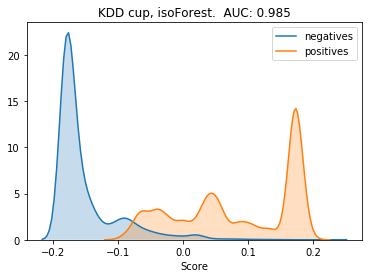

In [104]:
res = plot_outlier_scores(y_kdd.values, kdd_scores, bw=0.01, title='KDD cup, isoForest. ')

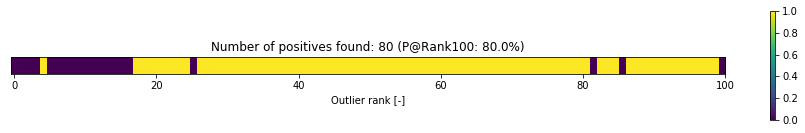

In [105]:
res = plot_top_N(y_kdd.values, kdd_scores)

TO-DO for LOF on KDD data: normalize the numeric data

In [111]:
clf = LocalOutlierFactor(n_neighbors=100)
clf.fit_predict(x_kdd)

array([ 1,  1, -1, ...,  1,  1,  1])

In [137]:
kdd_lof_scores = - np.log10(clf.negative_outlier_factor_ - min(clf.negative_outlier_factor_) + 0.1)

In [147]:
kdd_lof_scores = np.clip(kdd_lof_scores, -2.3, -2.16)

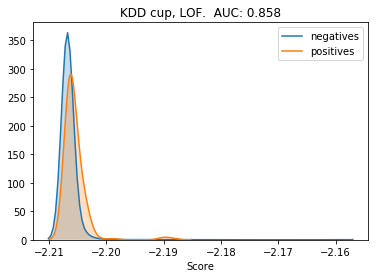

In [148]:
res = plot_outlier_scores(y_kdd.values, kdd_lof_scores, bw=0.001, title='KDD cup, LOF. ')

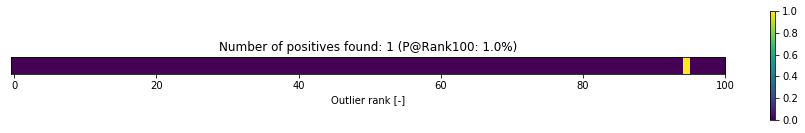

In [149]:
res = plot_top_N(y_kdd.values, kdd_lof_scores)

### Pen digits 

In [150]:
ifo = IsolationForest(n_estimators=50, max_samples=512)
ifo.fit(x_pen)
pen_scores = - ifo.decision_function(x_pen)

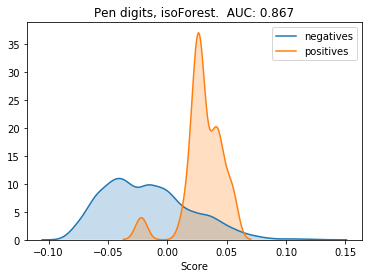

In [151]:
res = plot_outlier_scores(y_pen.values, pen_scores, bw=0.005, title='Pen digits, isoForest. ')

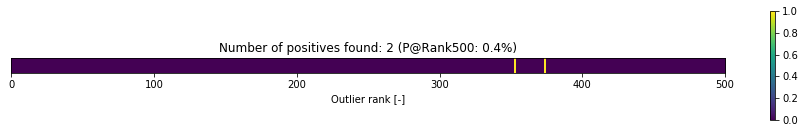

In [163]:
res = plot_top_N(y_pen.values, pen_scores, N=500)

In [152]:
clf = LocalOutlierFactor(n_neighbors=100)
clf.fit_predict(x_pen)

array([1, 1, 1, ..., 1, 1, 1])

In [153]:
pen_lof_scores = - np.log10(clf.negative_outlier_factor_ - min(clf.negative_outlier_factor_) + 0.1)

In [159]:
pen_lof_scores = np.clip(pen_lof_scores, -0.5, 0.2)

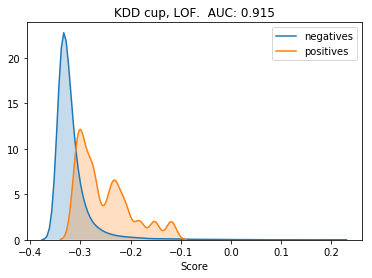

In [160]:
res = plot_outlier_scores(y_pen.values, pen_lof_scores, bw=0.01, title='KDD cup, LOF. ')

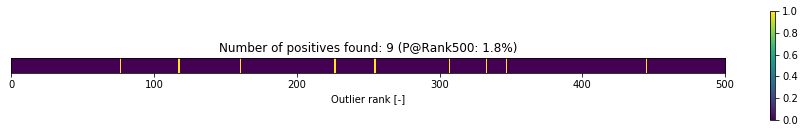

In [162]:
res = plot_top_N(y_pen.values, pen_lof_scores, N=500)